In [ ]:
import os

# Check the current working directory
print("Current Working Directory:", os.getcwd())

# Change the working directory to 'my_project' on the Desktop
os.chdir('C:/Users/User/Desktop/Big data')

# Verify the change
print("New Working Directory:", os.getcwd())


In [17]:
import pandas as pd

# Load 4G performance data
performance_data = pd.read_excel('C:/Users/User/Desktop/Big data/4G_perfromance_data_atCBH.xlsx')

# Load geolocation data
geolocation_data = pd.read_excel('C:/Users/User/Desktop/Big data/geo_location_data.xlsx')

# Display the first few rows of each dataset
print(performance_data.head())
print(geolocation_data.head())


         Date   Time  Site_ID  Integrity  RRC Connected User_Opt2  \
0  06/04/2024  00:00   151040          1                 222.8447   
1  06/04/2024  00:00   151421          1                 148.3067   
2  06/04/2024  00:00   151570          1                  32.5324   
3  06/04/2024  00:00   151565          1                 199.9325   
4  06/04/2024  00:00   151100          1                 640.4740   

   CELl Average User_ENG  CELL Maximum User_ENG  DL Traffic(GB)_ENG(GB)  \
0               222.8447                    293                 41.1588   
1               148.3067                    196                 22.7367   
2                32.5324                     49                  8.0042   
3               199.9325                    267                 28.4279   
4               640.4740                    903                 44.4312   

   UL Traffic(GB)_ENG(GB)  Total Traffic (GB)_ENG(GB)  \
0                  6.0468                     47.2055   
1                  1

In [25]:
# Check for missing values in performance data
print(performance_data.isnull().sum())

# Fill missing values with the median or mean as appropriate
#performance_data.fillna(performance_data.median(), inplace=True)

# Normalize geolocation data (e.g., converting coordinates to a standard format)
geolocation_data['Latitude'] = geolocation_data['Latitude'].apply(lambda x: float(x))
geolocation_data['Longitue'] = geolocation_data['Longitue'].apply(lambda x: float(x))

# Display summary statistics to verify preprocessing
print(performance_data.describe())
print(geolocation_data.describe())


Date                              0
Time                              0
Site_ID                           0
Integrity                         0
RRC Connected User_Opt2           0
CELl Average User_ENG             0
CELL Maximum User_ENG             0
DL Traffic(GB)_ENG(GB)            0
UL Traffic(GB)_ENG(GB)            0
Total Traffic (GB)_ENG(GB)        0
CCE Utilization(%)_ENG(%)         4
DL PRB Utilization_ENG(%)         4
UL PRB Utilization_ENG(%)         4
DL_User Throughput_Eng(Mbit/s)    4
UL_User Throughput_Eng(Mbit/s)    4
RO.RAB Failures                   0
4G RRC Rejection_ SOC             0
dtype: int64
             Site_ID  Integrity  RRC Connected User_Opt2  \
count    2630.000000     2630.0              2630.000000   
mean   151370.456654        1.0               450.922776   
std       279.353283        0.0               284.048208   
min    151002.000000        1.0                 0.000000   
25%    151084.000000        1.0               232.644175   
50%    151530.0

In [33]:
# Aggregate network performance data by site
aggregated_performance = performance_data.groupby('Site_ID').agg({
    'RRC Connected User_Opt2': 'mean',
    'DL PRB Utilization_ENG(%)': 'mean',
    'DL_User Throughput_Eng(Mbit/s)': 'mean',
    '4G RRC Rejection_ SOC': 'mean',
    'RO.RAB Failures': 'mean',
}).reset_index()

# Merge the aggregated performance data with geolocation data
merged_data = pd.merge(aggregated_performance, geolocation_data, on='Site_ID')

# Calculate additional metrics if needed
#merged_data['efficiency'] = merged_data['throughput'] / merged_data['latency']

# Display the merged dataset
print(merged_data.head())


   Site_ID  RRC Connected User_Opt2  DL PRB Utilization_ENG(%)  \
0   151002               550.109987                  96.239900   
1   151003               947.099832                  73.903935   
2   151004               947.903390                  67.506065   
3   151005               246.287839                  82.618700   
4   151006               646.425839                  95.160839   

   DL_User Throughput_Eng(Mbit/s)  4G RRC Rejection_ SOC  RO.RAB Failures  \
0                        2.211732             131.645161       180.451613   
1                        2.573584             148.258065       243.451613   
2                        2.325745             223.580645       268.129032   
3                        2.055842              23.419355        61.419355   
4                        1.844816             115.838710       185.387097   

   Longitue  Latitude  
0   42.8038    9.3712  
1   42.7984    9.3636  
2   42.7897    9.3698  
3   42.7883    9.3473  
4   42.8013    9.341

In [58]:
import numpy as np

# Define criteria for optimal site selection (e.g., high throughput and low latency)
criteria = (
    (merged_data['DL_User Throughput_Eng(Mbit/s)'] < 3) &  # First criterion: DL User Throughput less than the 3rd percentile
    (merged_data['DL PRB Utilization_ENG(%)'] > 70) &  # Second criterion: UL User Throughput greater than the 90th percentile
    (merged_data['RRC Connected User_Opt2'] > 500) &                             # Third criterion: Latency less than 50 ms
    (merged_data['4G RRC Rejection_ SOC'] > 100) & 
    (merged_data['RO.RAB Failures'] > 100)
     )
optimal_sites = merged_data[criteria]

# Display the optimal sites
print("Optimal sites for 5G deployment:")
print(optimal_sites)


Optimal sites for 5G deployment:
    Site_ID  RRC Connected User_Opt2  DL PRB Utilization_ENG(%)  \
0    151002               550.109987                  96.239900   
1    151003               947.099832                  73.903935   
4    151006               646.425839                  95.160839   
7    151009               950.414703                  82.868755   
12   151037               580.120277                  95.956048   
17   151059               879.754181                  96.626829   
20   151082               753.076019                  95.702032   
23   151091               518.124700                  91.402477   
24   151092               547.064800                  94.459258   
27   151096              1239.811097                  95.636416   
29   151100               753.014368                  94.925977   
37   151234               526.263755                  97.181694   
40   151419              1400.712606                  93.431723   
45   151532               705

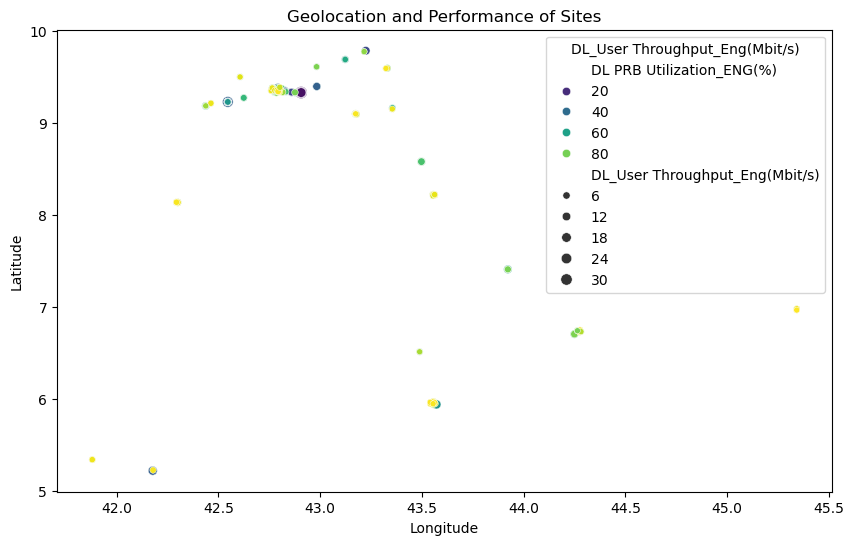

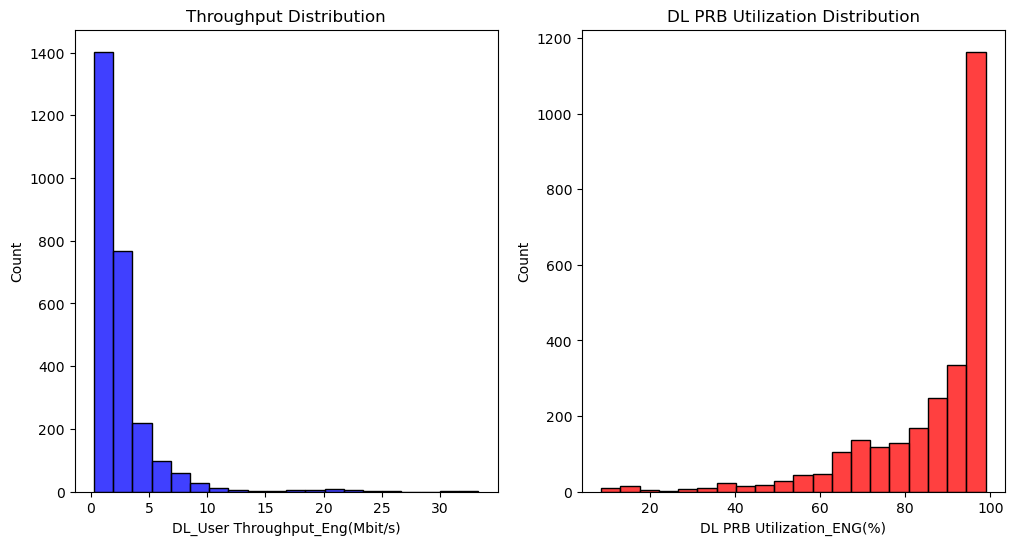

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot site locations and performance metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Longitue', y='Latitude', hue='DL PRB Utilization_ENG(%)', size='DL_User Throughput_Eng(Mbit/s)', palette='viridis')
plt.title('Geolocation and Performance of Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='DL_User Throughput_Eng(Mbit/s)')
plt.show()

# Plot histogram of throughput 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_data['DL_User Throughput_Eng(Mbit/s)'], bins=20, color='blue')
plt.title('Throughput Distribution')

plt.subplot(1, 2, 2)
sns.histplot(merged_data['DL PRB Utilization_ENG(%)'], bins=20, color='red')
plt.title('DL PRB Utilization Distribution')
plt.show()


In [69]:
# Check for missing values
print(performance_data.isnull().sum())
print(geolocation_data.isnull().sum())

# Handling missing values (example: dropping rows with missing values)
performance_data.dropna(inplace=True)
geolocation_data.dropna(inplace=True)

# Merging datasets on a common column (e.g., 'Site_ID' or similar)
merged_data = pd.merge(performance_data, geolocation_data, on='Site_ID')  # Replace 'Site_ID' with actual common column name
print(merged_data.head())


Date                              0
Time                              0
Site_ID                           0
Integrity                         0
RRC Connected User_Opt2           0
CELl Average User_ENG             0
CELL Maximum User_ENG             0
DL Traffic(GB)_ENG(GB)            0
UL Traffic(GB)_ENG(GB)            0
Total Traffic (GB)_ENG(GB)        0
CCE Utilization(%)_ENG(%)         0
DL PRB Utilization_ENG(%)         0
UL PRB Utilization_ENG(%)         0
DL_User Throughput_Eng(Mbit/s)    0
UL_User Throughput_Eng(Mbit/s)    0
RO.RAB Failures                   0
4G RRC Rejection_ SOC             0
dtype: int64
Site_ID     0
Longitue    0
Latitude    0
dtype: int64
         Date   Time  Site_ID  Integrity  RRC Connected User_Opt2  \
0  06/04/2024  00:00   151040          1                 222.8447   
1  06/04/2024  00:00   151421          1                 148.3067   
2  06/04/2024  00:00   151570          1                  32.5324   
3  06/04/2024  00:00   151565          1    

In [71]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


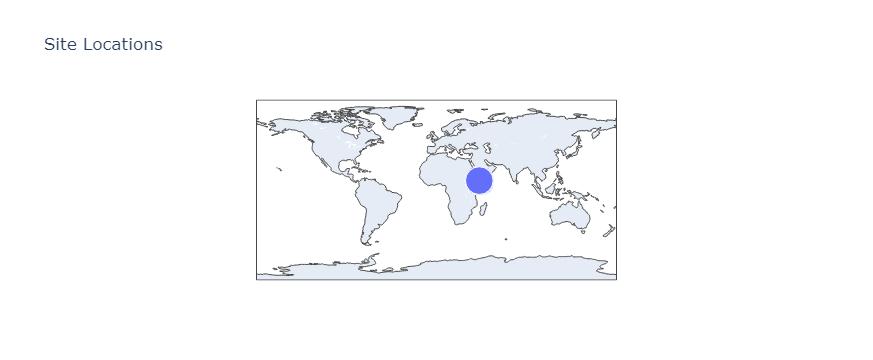

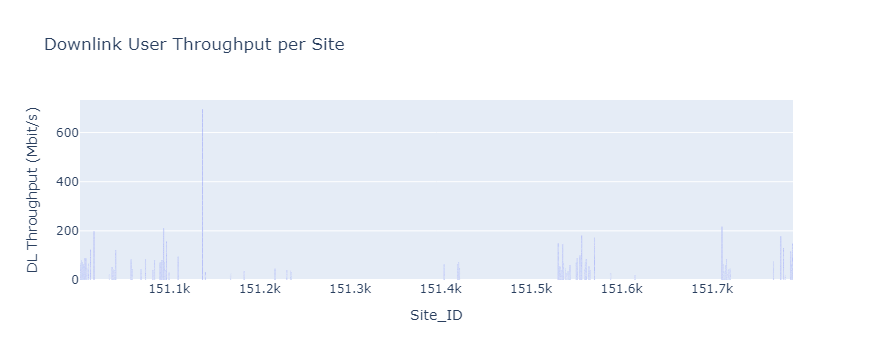

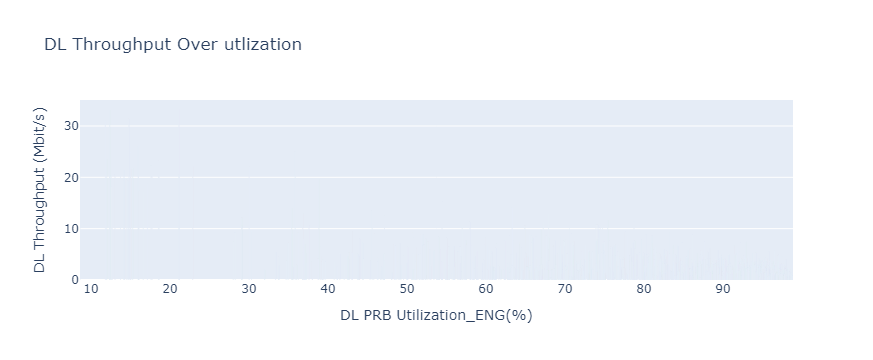

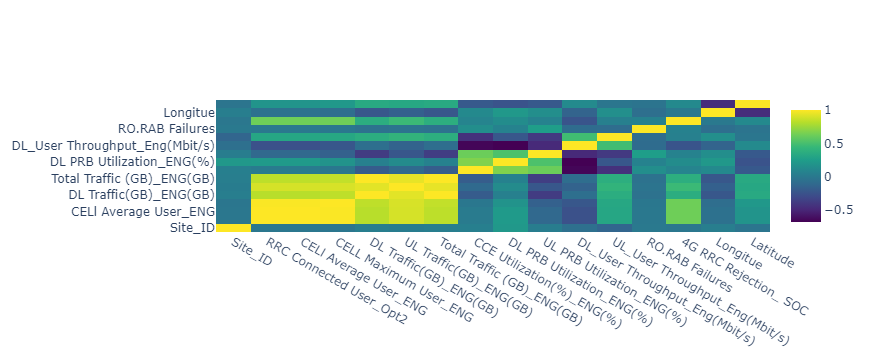

In [103]:
import plotly.express as px
import plotly.graph_objects as go

# 1. Map Visualization for Site Locations
fig_map = px.scatter_geo(
    geolocation_data,
    lat='Latitude',   
    lon='Longitue',  
    hover_name='Site_ID',  
    size='Latitude',  
    title='Site Locations'
)
fig_map.show()

# 2. Bar Chart for DL User Throughput
fig_bar = px.bar(
    performance_data,
    x='Site_ID',  # Replace with actual column for x-axis
    y='DL_User Throughput_Eng(Mbit/s)',  # Replace with the actual column name
    title='Downlink User Throughput per Site',
    labels={'DL_User Throughput_Eng(Mbit/s)': 'DL Throughput (Mbit/s)'}
)
fig_bar.show()

# 3. Line Chart for Latency Over Time
fig_bar = px.bar(
    performance_data,
    x='DL PRB Utilization_ENG(%)',  # Replace with the actual timestamp or date column
    y='DL_User Throughput_Eng(Mbit/s)',  # Replace with the actual latency column name
    title='DL Throughput Over utlization',
    labels={'DL_User Throughput_Eng(Mbit/s)': 'DL Throughput (Mbit/s)'}
)
fig_bar.show()

# 4. Heatmap for Correlation Between Metrics
import numpy as np

#import plotly.graph_objects as go

# .

# Select only numeric columns
numeric_data = merged_data.select_dtypes(include=['number'])

# Drop columns with zero variance 
numeric_data = numeric_data.loc[:, numeric_data.var() != 0]

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

fig_heatmap = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis'
))

fig_heatmap.show()


pip install dash

In [119]:
from dash import Dash, dcc, html

# Initialize the Dash app
app = Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("5G Network Performance Dashboard"),
    
    # Map
    dcc.Graph(id='map-graph', figure=fig_map),
    
    # Bar Chart
    dcc.Graph(id='bar-chart', figure=fig_bar),
    
    # Line Chart
    dcc.Graph(id='line-chart', figure=fig_line),
    
    # Heatmap
    dcc.Graph(id='heatmap', figure=fig_heatmap)
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)